In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('data.csv')
df = df[df.makespan != "/"]
df['makespan'] = pd.to_numeric(df['makespan'])
df['option'] = df['number of jobs'].astype(str) + 'x' + df['number of machines'].astype(str)

In [39]:
df

,method,number of jobs,number of machines,game,time,makespan,iteration,option
0,Brute-force,5,3,G1,0.003770113,6.525391,/,5x3
1,MMAS,5,3,G1,0.110120058,6.647114,4,5x3
2,iML,5,3,G1,17,6.783435,1,5x3
3,Brute-force,5,3,G2,0.003872156,6.160295,/,5x3
4,MMAS,5,3,G2,0.094216585,6.318422,31,5x3
...,...,...,...,...,...,...,...,...
83,iML,12,6,G3,70,17.705821,6,12x6
85,MMAS,12,6,G4,0.491947412,17.999867,53,12x6
86,iML,12,6,G4,91,18.050343,6,12x6
88,MMAS,12,6,G5,0.485041857,17.286877,58,12x6


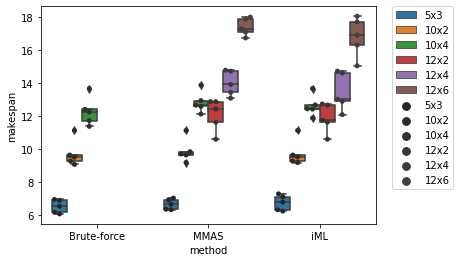

In [46]:
ax = sns.boxplot(x="method", y="makespan", hue="option", data=df)
ax = sns.swarmplot(x="method", y="makespan", hue="option", data=df, color=".25", dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('results.png', dpi=400, facecolor=ax.get_facecolor(), bbox_inches="tight")